In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define system parameters
Nmics = 64
Nsamp = 100
src = (0, 0)
pitch = 0.1
dist_per_samp = 0.1

# Initialize microphone locations
mics = []

# Calculate microphone positions for different numbers
if Nmics % 2 == 0:
    half_mics = int(Nmics / 2)
    for i in range(half_mics):
        mics.append(-(pitch * Nmics) / 2 + i * pitch)
    mics.extend([-x for x in reversed(mics)])
else:
    mics.append(0.0)
    half_mics_minus_one = int((Nmics - 1) / 2)
    for i in range(half_mics_minus_one):
        mics.append(-(pitch * (Nmics - 1)) / 2 + i * pitch)
    mics.extend([-x for x in reversed(mics)])

# Location of the obstacle
obstacle = (3, -1)

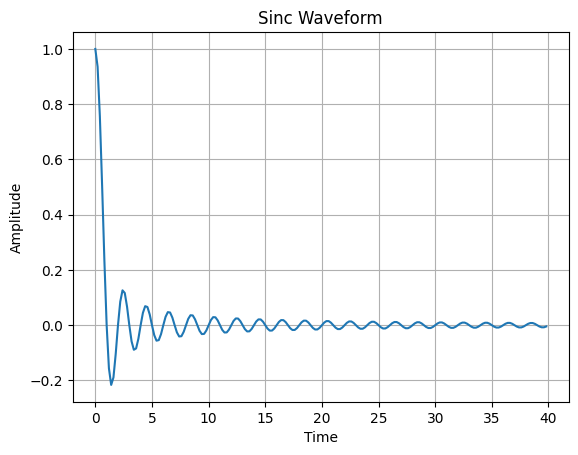

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Speed of sound in the medium
C = 0.5
# Time dilation factor for sinc pulse: how narrow
SincP = 1.0

# Function to generate the waveform
def wsrc(t):
    return np.sinc(SincP * t)

t = 0
time = []
wave = []

# Generating the waveform over time
Nsamp = 200
dist_per_samp = 0.1

for i in range(Nsamp):
    time.append(t)
    wave.append(wsrc(t))
    t = ((i + 1) * dist_per_samp) / C

time = np.array(time)
wave = np.array(wave)

# Plot the waveform
plt.clf()
plt.plot(time, wave)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sinc Waveform')
plt.grid(True)
plt.show()
plt.savefig('image1.png')

In [8]:
def dist(src, pt, mic):
    d1 = (pow((src[0] - pt[0]),2) + pow((src[1] - pt[1]),2))**0.5  # CODE distance from src to pt
    d2 = (pow((mic[0] - pt[0]),2) + pow((mic[1] - pt[1]),2))**0.5 # CODE distance from pt to mic
    return d1 + d2

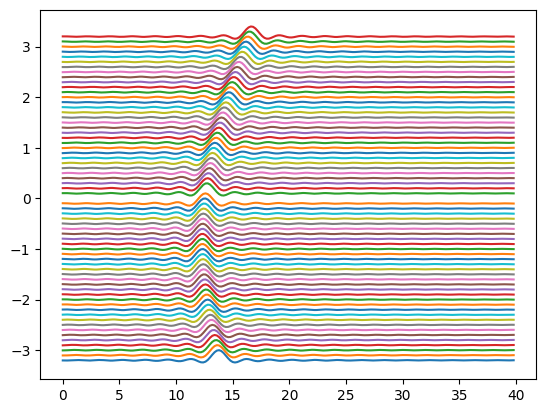

<Figure size 640x480 with 0 Axes>

In [9]:
# Clearing previous plots
plt.clf()

# Empty array for microphone outputs
mic_op = np.zeros((Nmics, Nsamp))

# Calculating and plotting microphone outputs
for i in range(Nmics):
    del_t = np.array([dist(src, obstacle, (0, mics[i])) / C])

    time_vals = np.linspace(0, (Nsamp - 1) * dist_per_samp / C, Nsamp)
    t_adjusted = time_vals[:, np.newaxis] - del_t

    op = wsrc(t_adjusted) * 0.2
    mic_op[i] = op.flatten() + mics[i]

    plt.plot(time_vals, mic_op[i])

plt.show()
plt.savefig('image2.png')

<Figure size 640x480 with 0 Axes>

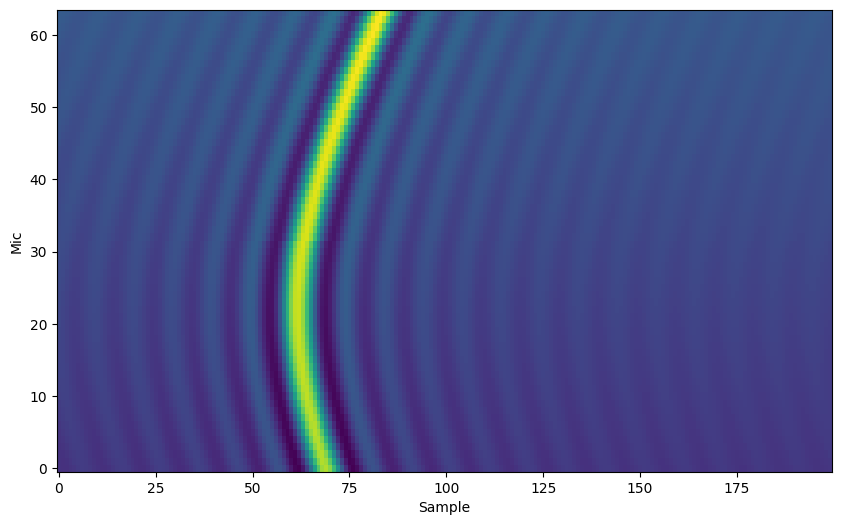

<Figure size 640x480 with 0 Axes>

In [10]:
plt.clf()
mic_op = np.zeros((Nmics, Nsamp))

plt.clf()

# Initializing a matrix to store the operation for each microphone
mic_op = np.zeros((Nmics, Nsamp))

# Iterating through each microphone
for i in range(Nmics):
    del_ts = [dist(src, obstacle, (0, mics[i])) / C for _ in range(Nsamp)]
    time = np.arange(Nsamp) * dist_per_samp / C

    # Applying a function wsrc to the time differences and scaling the result
    ops = wsrc(time - np.array(del_ts)[:, np.newaxis]) * 0.2

    # Summing the operations and adding the current microphone position
    mic_op[i, :] = np.sum(ops, axis=0) + mics[i]


plt.figure(figsize=(10, 6))  # Adjusting the figure size to your preference
plt.imshow(mic_op, aspect='auto', origin='lower', cmap='viridis', interpolation='nearest')
plt.xlabel('Sample')
plt.ylabel('Mic')
plt.show()
plt.savefig('image3.png')



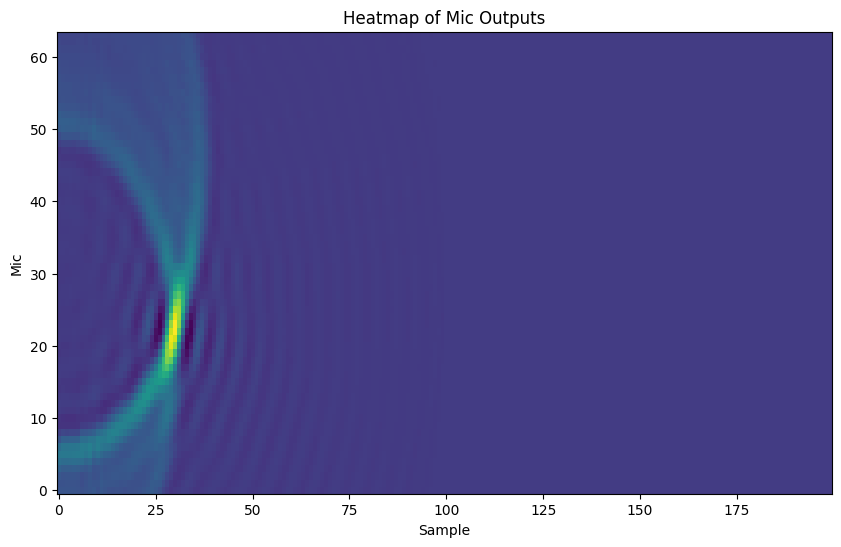

<Figure size 640x480 with 0 Axes>

In [11]:
htmap = np.zeros((Nmics, Nsamp))

# Iterating through each sample index
for i in range(Nsamp):
    # Iterating through each microphone
    for j in range(Nmics):
        pt = (i * dist_per_samp, mics[j])
        val = 0

        # Iterating through all microphones to calculate sound delays and contributions
        for k in range(Nmics):
            # Calculating the time delay for sound propagation from the source to the current point
            delay = dist(src, pt, (0, mics[k])) / C

            # Finding the index of the first time that exceeds the delay
            sample_time = np.argmax(time >= delay)

            if sample_time < len(time):  # If a valid index is found within the time array
                val += mic_op[k][sample_time]

        htmap[j][i] = val


plt.figure(figsize=(10, 6))  # Adjusting the figure size to preference

plt.imshow(htmap, aspect='auto', origin='lower', cmap='viridis', interpolation='nearest')
plt.xlabel('Sample')
plt.ylabel('Mic')
plt.show()
plt.savefig('image4.png')

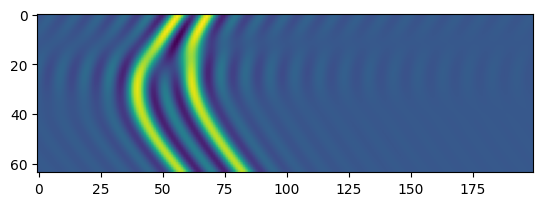

<Figure size 640x480 with 0 Axes>

In [12]:
data1 = np.loadtxt('rx2.txt')
plt.imshow(data1)
plt.show()
plt.savefig('image5.png')

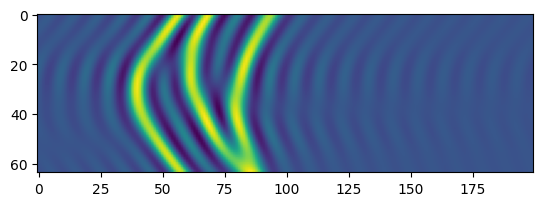

<Figure size 640x480 with 0 Axes>

In [13]:
data2 = np.loadtxt('rx3.txt')
plt.imshow(data2)
plt.show()
plt.savefig('image6.png')

